In [1]:
import logging

import graphcat.notebook

logging.basicConfig(level=logging.DEBUG)

DEBUG:graphcat:Task foo updating.
INFO:graphcat:Task foo executing. Inputs: {None: [None]}
INFO:graphcat:Task foo finished. Output: foo
DEBUG:graphcat:Task bar updating.
INFO:graphcat:Task bar executing. Inputs: {None: ['foo']}
INFO:graphcat:Task bar finished. Output: bar
DEBUG:graphcat:Task baz updating.
INFO:graphcat:Task baz executing. Inputs: {None: ['bar']}
INFO:graphcat:Task baz finished. Output: baz


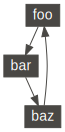

In [2]:
graph = graphcat.Graph()
logger = graphcat.Logger(graph)

graph.set_task("foo", graphcat.constant("foo"))
graph.set_task("bar", graphcat.constant("bar"))
graph.set_task("baz", graphcat.constant("baz"))

graph.set_links("foo", "bar")
graph.set_links("bar", "baz")
graph.set_links("baz", "foo")

graph.update("baz")
graphcat.notebook.display(graph)

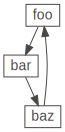

In [3]:
graph.mark_unfinished("foo")
graphcat.notebook.display(graph)

DEBUG:graphcat:Task bar updating.
INFO:graphcat:Task bar executing. Inputs: {None: [None]}
INFO:graphcat:Task bar finished. Output: bar
DEBUG:graphcat:Task baz updating.
INFO:graphcat:Task baz executing. Inputs: {None: ['bar']}
INFO:graphcat:Task baz finished. Output: baz
DEBUG:graphcat:Task foo updating.
INFO:graphcat:Task foo executing. Inputs: {None: ['baz']}
INFO:graphcat:Task foo finished. Output: foo


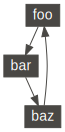

In [4]:
graph.update("foo")
graphcat.notebook.display(graph)

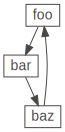

In [5]:
graph.mark_unfinished("bar")
graphcat.notebook.display(graph)

In [6]:
graph.links()

[('baz', ('foo', None)), ('foo', ('bar', None)), ('bar', ('baz', None))]